# GEQIE FRQCI Example

This is the example notebook that presents how to use GEQIE framework for encoding an image into its quantum representation using FRQCI method [(Li et al., 2016)](https://link.springer.com/article/10.1007/s11128-016-1413-x). 

## Setup

### Imports

In [2]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import geqie
from geqie.encodings import frqci

## Encoding

### Opening the image

Opening the test image and normalizing its pixel values to $[0.0, 1.0]$.

In [4]:
image = Image.open("../../assets/test_images/rgb/rgb.png")
image = np.asarray(image)
image

array([[[255,   0,   0],
        [  0, 127,   0]],

       [[  0,   0,  85],
        [119, 119, 119]]], dtype=uint8)

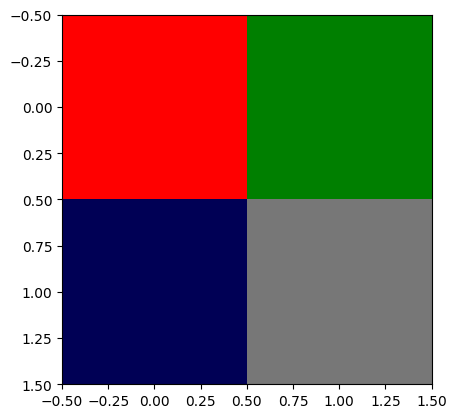

In [5]:
plt.imshow(image)

### Encoding using unitary gate

In [6]:
circuit = geqie.encode(frqci.init_function, frqci.data_function, frqci.map_function, image)
circuit.draw(output='text')

┌──────────────────────────────────────┐┌──────────┐ ░ ┌─┐      
   q_0: ┤0                                     ├┤0         ├─░─┤M├──────
        │                                      ││          │ ░ └╥┘┌─┐   
   q_1: ┤1 Initialize(0.5,0,0.5,0,0.5,0,0.5,0) ├┤1 Unitary ├─░──╫─┤M├───
        │                                      ││          │ ░  ║ └╥┘┌─┐
   q_2: ┤2                                     ├┤2         ├─░──╫──╫─┤M├
        └──────────────────────────────────────┘└──────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                                0  1  2

### Simulating the circuit

The stemplot represents the number of results for each possible quantum state of the system with decimal basis where, e.g., $\ket{13} \equiv \ket{01101}$.

Text(0, 0.5, 'n_results')

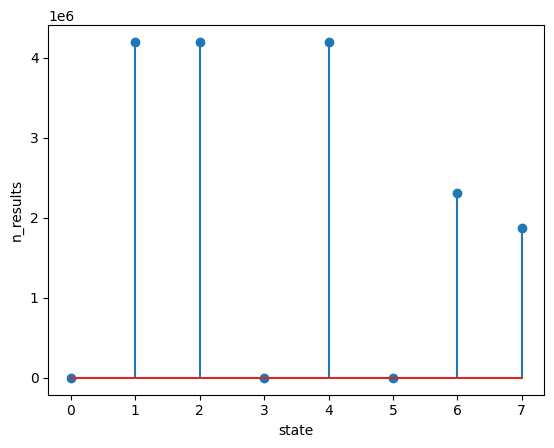

In [15]:
result = geqie.simulate(circuit, 2**24, return_padded_counts=True)
plt.stem(result.values())
plt.xlabel("state")
plt.ylabel("n_results")

### Retrieving the image

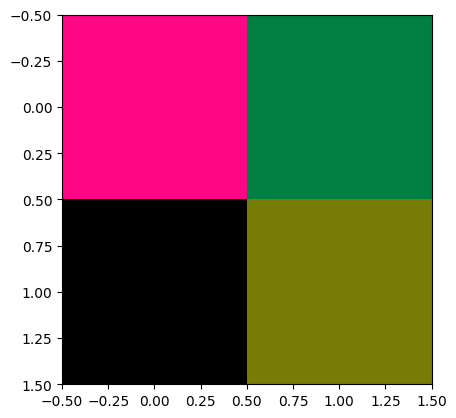

In [17]:
retrieved_image = frqci.retrieve_function(result)
plt.imshow(retrieved_image)
plt.show()

The color is encoded by the last qubit $c$, hence to retrieve the image one has to calculate the average number of resulting $c = \ket{1}$ for each pixel.

## Image comparison

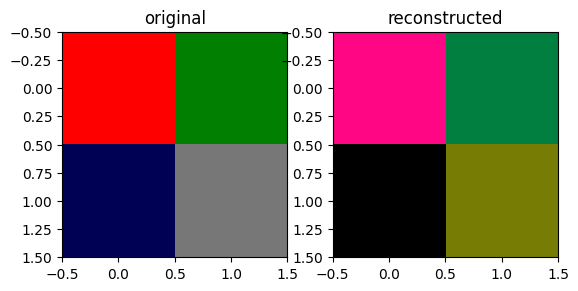

In [28]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image)

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrieved_image)

In [19]:
image

array([[[255,   0,   0],
        [  0, 127,   0]],

       [[  0,   0,  85],
        [119, 119, 119]]], dtype=uint8)

In [20]:
retrieved_image

array([[[255,   6, 132],
        [  0, 127,  65]],

       [[  0,   0,   0],
        [119, 125,   4]]], dtype=uint8)

In [26]:
pcc, p_value = stats.pearsonr(image.flatten(), retrieved_image.flatten())
print(f"{pcc=:.3f}, {p_value=:.2e}")

pcc=0.717, p_value=8.65e-03
